# M8 - W3 Assignment: Clustering

## **Introduction**

In this assignment, I will-

* Download the data from https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-pythonLinks to an external site.
* Clean the data and perform exploratory
* Normalise the data before clustering.
* Perform clustering of the data by K-means clustering because it is very effective when segmenting data and attempting to find patterns.
* Apply inertia and silhouette score to find optimal number of clusters with explanation to design marketing strategy of the mall owner. 

## **Step 1: Imports** 

Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

In [228]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
# IMPORT THE DATA. 
# Save the `pandas` DataFrame in variable `mall`. 

mall = pd.read_csv("Mall_Customers.csv")


Now, review the first and last few rows of data.


In [231]:
# Review the first few rows.
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [232]:
# Review the last few rows.
mall.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## **Step 2: Data exploration** 

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster mall customer data of Gender determine how many unique customer types are in the dataset.

In [235]:
# Find out how many customer types there are.

mall['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [236]:
# Find the count of each customer type.

mall['Gender'].value_counts(dropna = False)

Gender
Female    112
Male       88
Name: count, dtype: int64

**Question:** How many types of customers are present in the dataset?

There are two types of customers. Note the Male customers are less than Female customers. This has a chance to affect K-means clustering as K-means performs best with similar sized groupings.

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data. 

In [240]:
# Check for missing values.

mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in the dataset

### Encode data

K-means needs numeric columns for clustering. We have all other columns as numeric. There is no need to convert the 'Gender' column because it isn't being used as a feature in the clustering algorithm. 

### Drop a column

Drop the column 'CustomerID' from the dataset because the values are only used for identity purposes.

Note that the 'Gender' column is not numeric. Don't drop this for now. It could potentially be used to help understand the clusters later. 

In [245]:
# Drop the CustomerID column.

mall = mall.drop(['CustomerID'], axis=1)

### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point of X by subtracting the mean observed value for that feature and dividing by the standard deviation:

*Note:** Because the Gender column isn't a feature, it doesn't need to be scaled. 

First, copy all the features except the 'Gender' column to a DataFrame 'X'. 

In [247]:
# Exclude 'Gender' variable from X

X = mall.drop(['Gender'], axis=1)

Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`. 

In [249]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.

X_scaled = StandardScaler().fit_transform(X)

## **Step 3: Data modeling** 

Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. 

In [252]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints. 
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [254]:
# Return a list of inertia for k=2 to 10.

inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/

[389.3861889564372,
 295.2122461555488,
 205.22514747675913,
 168.24758017556834,
 133.86842085478855,
 117.01155455889813,
 103.87329152383715,
 93.09289110041728,
 82.38515364526599]

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.
Use either seaborn or matplotlib to visualize this relationship. 

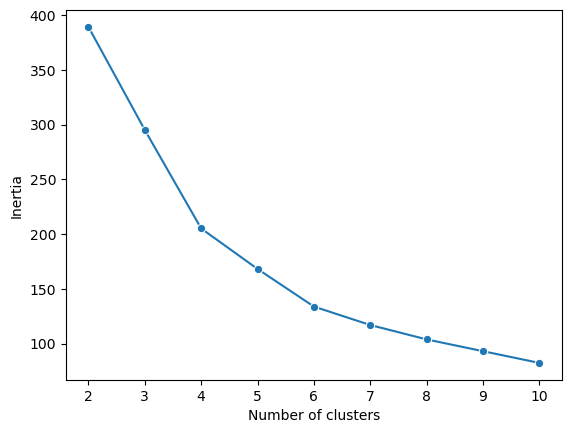

In [256]:
# Create a line plot.

### YOUR CODE HERE ###

plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

**Question:** Where is the elbow in the plot?

The plot seems to depict an elbow at six clusters, but there isn't a clear method for confirming that a six-cluster model is optimal. Therefore, the silhouette scores should be checked. 

## **Step 4: Results and evaluation** 

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters. 

Then, compare the silhouette score of each value of k, from 2 through 10. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [261]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.

def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/

[0.33547192894004574,
 0.357793388710272,
 0.4039582785148566,
 0.41664341513732767,
 0.4284167762892593,
 0.417231894954916,
 0.4082067042807375,
 0.41769250624076476,
 0.40655411010117015]

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the `kmeans_sil` function video.
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Use either seaborn or matplotlib to visualize this relationship. 

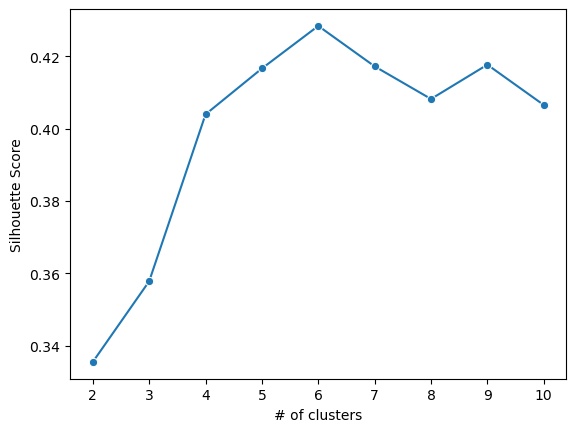

In [264]:
# Create a line plot.

### YOUR CODE HERE ###

plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

**Question:** What does the graph show?

Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters. 

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters.

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset. 

In [268]:
# Fit a 6-cluster model.

kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

Print out the unique labels of the fit model.

In [270]:
# Print unique labels.

print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `mall`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

In [272]:
# Create a new column `cluster`.

mall['cluster'] = kmeans6.labels_
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,5
3,Female,23,16,77,4
4,Female,31,17,40,5


Use `groupby` to verify if any `'cluster'` can be differentiated by `'Gender'`.

In [274]:
# Verify if any `cluster` can be differentiated by `Gender`.

mall.groupby(by=['cluster', 'Gender']).size()

cluster  Gender
0        Female    26
         Male      19
1        Female    25
         Male      14
2        Female    14
         Male      19
3        Female    21
         Male      18
4        Female    13
         Male      10
5        Female    13
         Male       8
dtype: int64

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'Gender'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'Gender'`. 

In [293]:
# Print column names
print(mall.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')


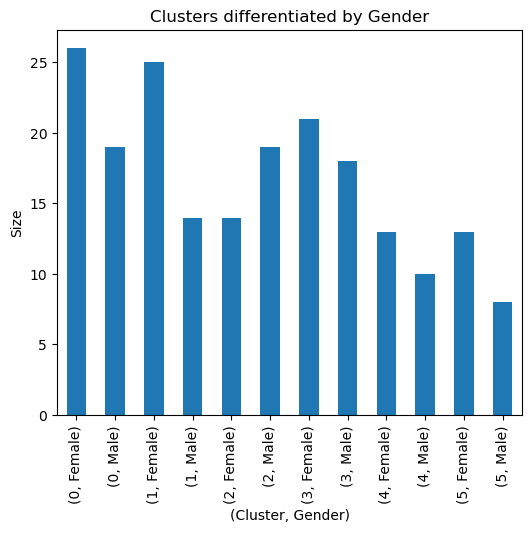

In [295]:
mall.groupby(by=['cluster', 'Gender']).size().plot.bar(title='Clusters differentiated by Gender',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Gender)');

# Print customers' detailed information based on each Cluster

In [291]:
# Group by 'cluster' and 'Gender'
clustered_data = mall.groupby(['cluster', 'Gender'])

# Iterate through each group and display customer details
for (cluster, gender), details in clustered_data:
    print(f"Cluster {cluster} - Gender: {gender}")
    print(details[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    print("\n")


Cluster 0 - Gender: Female
     Age  Annual Income (k$)  Spending Score (1-100)
40    65                  38                      35
46    50                  40                      55
50    49                  42                      52
54    50                  43                      45
56    51                  44                      50
62    67                  47                      52
63    54                  47                      59
66    43                  48                      50
67    68                  48                      48
71    47                  49                      42
72    60                  50                      49
73    60                  50                      56
76    45                  54                      53
79    49                  54                      42
83    46                  54                      44
86    55                  57                      58
89    50                  58                      46
90    68           

## **Summary to Mall management**

*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about customers.